In [1]:
import torch
import torch.nn as nn

In [2]:
import torch.optim as optim
import matplotlib.pyplot as plt

In [13]:
torch.manual_seed(42)
x=torch.linspace(0,10,100).unsqueeze(1)
y=2*x+3+torch.randn_like(x)*2

In [14]:
class LinearRegresion(nn.Module):
    def __init__(self):
        super(LinearRegresion,self).__init__()
        self.linear=nn.Linear(1,1)
    
    def forward(self, x):
        return self.linear(x)
    
model=LinearRegresion()

In [15]:
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)


In [11]:
epochs=1000
losses=[]


In [22]:
for epoch in range(epochs):
    # Forward pass
    predictions = model(x)
    loss = criterion(predictions, y)

    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters

    # Track loss
    losses.append(loss.item())

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")


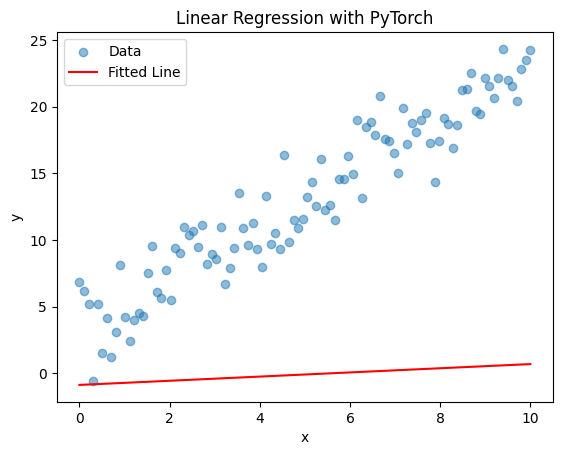

linear.weight: [[0.15637112]]
linear.bias: [-0.8799213]


In [23]:
plt.scatter(x.numpy(), y.numpy(), label="Data", alpha=0.5)
plt.plot(x.numpy(), model(x).detach().numpy(), label="Fitted Line", color="red")
plt.legend()
plt.title("Linear Regression with PyTorch")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Step 6: Evaluate the Model
# Print the learned parameters (weights and bias)
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy()}")